<a href="https://colab.research.google.com/github/madhugopinathan/deep-nlu/blob/master/access_glove_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
!wget http://nlp.stanford.edu/data/glove.6B.zip

--2019-08-03 07:38:05--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2019-08-03 07:38:05--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2019-08-03 07:38:05--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [39]:
!ls

glove.6B.zip  sample_data


In [40]:
!mkdir glove
!mv glove.6B.zip glove

unzip:  cannot find or open glove.6B.zip, glove.6B.zip.zip or glove.6B.zip.ZIP.


In [43]:
%cd glove
!unzip glove.6B.zip

/content/glove
Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [0]:
import pandas as pd

In [0]:
import csv

In [0]:
glove_df = pd.read_csv("./glove.6B.300d.txt", sep=' ', 
                       header=None, index_col=0, 
                       quoting=csv.QUOTE_NONE)

In [47]:
glove_df.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300
0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
the,0.046560,0.213180,-0.007436,-0.458540,-0.035639,0.236430,-0.288360,0.215210,-0.134860,-1.6413,-0.26091,0.032434,0.056621,-0.043296,-0.021672,0.224760,-0.075129,-0.067018,-0.142470,0.038825,-0.189510,0.29977,0.393050,0.178870,-0.173430,-0.211780,0.236170,-0.063681,-0.423180,-0.116610,0.093754,0.172960,-0.33073,0.491120,-0.68995,-0.092462,0.247420,-0.179910,0.097908,0.083118,...,-0.287970,-0.058996,-0.032436,-0.004701,-0.170520,-0.034741,-0.114890,0.075093,0.099526,0.048183,-0.073775,-0.418170,0.004127,0.44414,-0.16062,0.142940,-2.2628,-0.027347,0.81311,0.774170,-0.256390,-0.115760,-0.119820,-0.21363,0.028429,0.27261,0.031026,0.096782,0.006777,0.140820,-0.013064,-0.296860,-0.079913,0.195000,0.031549,0.285060,-0.087461,0.009061,-0.209890,0.053913
",",-0.255390,-0.257230,0.131690,-0.042688,0.218170,-0.022702,-0.178540,0.107560,0.058936,-1.3854,0.58509,0.036501,-0.198460,0.196130,0.409290,0.157020,-0.153050,0.050447,0.300450,-0.112950,-0.017043,0.18593,0.199820,0.200530,-0.631410,-0.126220,0.295100,-0.262820,-0.158310,0.001238,0.011784,0.587580,-0.15914,0.277310,-0.82343,-0.211340,0.013414,0.196370,-0.414700,0.001028,...,-0.063187,-0.245530,-0.059751,0.068787,-0.116270,-0.008340,0.005204,-0.201590,-0.023663,0.175620,-0.314750,-0.111620,-0.124920,0.10949,-0.26913,0.348930,-1.6997,-0.244700,0.30292,0.056720,-0.317370,0.083612,0.095949,-0.17590,0.102350,0.36808,-0.343800,0.206070,0.191350,0.109920,0.075968,-0.014359,-0.073794,0.221760,0.146520,0.566860,0.053307,-0.232900,-0.122260,0.354990
.,-0.125590,0.013630,0.103060,-0.101230,0.098128,0.136270,-0.107210,0.236970,0.328700,-1.6785,0.22393,0.124090,-0.086708,0.330100,0.343750,-0.000876,-0.296580,0.244170,-0.115920,-0.035742,-0.010830,0.20776,0.292850,-0.073491,-0.185980,-0.200900,-0.095366,0.006373,-0.136200,0.092028,-0.039957,0.190270,-0.10456,0.002767,-0.71742,-0.129150,-0.001345,0.270020,-0.053023,0.221480,...,-0.136670,-0.439620,0.237040,0.031296,0.074701,-0.223870,0.007816,-0.190160,0.044444,0.201910,-0.208140,-0.283820,0.104270,-0.21098,0.18865,0.316590,-2.0753,-0.071045,0.52419,0.056023,-0.252950,-0.062168,-0.109890,-0.35755,-0.079244,0.37472,-0.283530,0.163370,0.111650,-0.098002,0.060148,-0.156190,-0.119490,0.234450,0.081367,0.246180,-0.152420,-0.342240,-0.022394,0.136840
of,-0.076947,-0.021211,0.212710,-0.722320,-0.139880,-0.122340,-0.175210,0.121370,-0.070866,-1.5721,-0.22464,0.042690,-0.401800,0.210060,0.014288,0.416280,0.017165,0.071732,0.006925,0.181070,-0.154120,0.14933,-0.030493,0.299180,0.029479,-0.036147,-0.061125,0.083918,-0.123980,-0.100770,-0.005414,0.337100,-0.25612,0.443880,-0.68922,0.180200,0.348980,-0.052284,-0.262260,-0.471090,...,0.467280,0.482140,0.105480,0.065805,0.067221,0.133210,-0.278560,0.015532,0.300260,0.387480,-0.144010,-0.161310,0.176780,0.16448,-0.32440,0.007937,-2.2836,0.096945,0.66131,0.168570,-0.028877,-0.107910,-0.027445,-0.25695,0.046686,0.23087,-0.076458,0.271270,0.251850,0.054947,-0.366730,-0.386030,0.302900,0.015747,0.340360,0.478410,0.068617,0.183510,-0.291830,-0.046533
to,-0.257560,-0.057132,-0.671900,-0.380820,-0.364210,-0.082155,-0.010955,-0.082047,0.460560,-1.8477,-0.11258,-0.129550,0.272540,0.007289,0.260380,0.120960,-0.231930,0.032260,-0.294720,-0.675940,-0.338440,-0.23297,0.110200,0.188160,-0.451840,-0.338330,0.112740,0.494900,-0.042132,0.079961,-0.013146,0.062284,0.20223,0.038279,-1.11540,-0.121400,0.089846,0.297020,-0.055794,-0.460210,...,0.327080,-0.520490,0.037555,0.023667,-0.068237,-0.229160,0.017755,-0.183940,0.551070,-0.239650,0.391870,-0.017785,0.431130,0.27181,-0.16043,-0.347000,-2.4194,-0.028952,0.95085,0.058040,-0.236230,0.189140,0.311920,0.23064,-0.303090,-0.18603,

In [0]:
glove_mat = glove_df.values
glove_keys = {k:v for k,v in zip(glove_df.index, range(glove_df.shape[0]))}
idx2word = {v:k for k,v in glove_keys.items()}

In [0]:
del glove_df

In [50]:
%%time
glove_mat[glove_keys['queen']]

CPU times: user 18 µs, sys: 0 ns, total: 18 µs
Wall time: 22.6 µs


array([-2.2184e-01,  6.4884e-02, -8.6365e-02,  5.1279e-01,  3.2543e-01,
       -1.2934e-01,  8.3160e-02,  9.1629e-02, -3.0858e-01, -9.4149e-01,
       -8.8608e-02, -1.0847e-01,  2.1129e-01,  7.0052e-01,  2.6751e-01,
       -4.0477e-02,  1.7364e-01, -3.0757e-01, -5.2120e-02, -1.7512e-01,
       -8.4090e-01,  1.9205e-01, -1.3806e-01,  3.8520e-01,  2.7247e-01,
       -1.7401e-01, -4.6626e-01, -2.4944e-02,  9.6500e-02,  3.0107e-01,
        1.8020e-01, -6.8892e-02, -2.0452e-01,  3.5746e-01, -2.8313e-01,
        2.8063e-01, -1.1503e-02,  1.0674e-01, -2.4369e-01, -1.7907e-01,
       -1.3202e-01, -1.7021e-01, -5.9409e-01,  9.5749e-01,  2.0384e-01,
       -4.2887e-02,  6.0685e-01, -6.8825e-02,  5.2273e-01, -5.4755e-01,
       -5.4525e-01,  4.3453e-01,  4.4516e-01, -2.5659e-02, -1.1531e-01,
       -1.8587e-01,  3.6080e-01, -2.5104e-01,  7.2084e-01, -5.8240e-02,
        3.4400e-01,  4.7188e-01,  2.0461e-01,  6.9993e-01,  4.8738e-01,
       -9.0267e-01, -1.0382e-01,  1.2704e-01, -4.1078e-01,  4.03

In [0]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [54]:
!pip install annoy

     |████████████████████████████████| 645kB 2.8MB/s 
  Created wheel for annoy: filename=annoy-1.16.0-cp36-cp36m-linux_x86_64.whl size=309742 sha256=7bf843634e4cf276e21155663d8a5fdb75257b62178c8985f41b5e70e91844bd
  Stored in directory: /root/.cache/pip/wheels/39/34/9c/8d8eb3abce9375bade7b42bca387700b5f3aa18414d27272f0
Successfully built annoy


In [0]:
import spacy

In [0]:
from spacy.lang.en import English

In [0]:
nlp = spacy.load("en_core_web_sm")

In [0]:
doc = nlp("I like tree kangaroos and narwhals.")

In [61]:
list(doc)

[I, like, tree, kangaroos, and, narwhals, .]

In [62]:
!pwd

/content/glove


In [64]:
!wget https://s3.amazonaws.com/fast-ai-nlp/yelp_review_polarity_csv.tgz

--2019-08-03 08:50:51--  https://s3.amazonaws.com/fast-ai-nlp/yelp_review_polarity_csv.tgz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.136.37
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.136.37|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 166373201 (159M) [application/x-tar]
Saving to: ‘yelp_review_polarity_csv.tgz’

yelp_review_polarit 100%[===================>] 158.67M  49.2MB/s    in 3.5s    

2019-08-03 08:50:55 (45.2 MB/s) - ‘yelp_review_polarity_csv.tgz’ saved [166373201/166373201]



In [65]:
!tar xvfz yelp_review_polarity_csv.tgz

yelp_review_polarity_csv/
yelp_review_polarity_csv/train.csv
yelp_review_polarity_csv/readme.txt
yelp_review_polarity_csv/test.csv


In [66]:
%cd ..

/content


In [67]:
!pwd

/content


In [68]:
!ls

glove  sample_data


In [0]:
!mv glove deep-nlu-data

In [0]:
import torch

In [71]:
torch.__version__

'1.1.0'

In [72]:
%cd deep-nlu-data/yelp_review_polarity_csv/

/content/deep-nlu-data/yelp_review_polarity_csv


In [0]:
train_df = pd.read_csv("./train.csv", header=None)

In [78]:
train_df.shape

(560000, 2)

In [81]:
train_df.head()

,rating,review
0,1,"Unfortunately, the frustration of being Dr. Go..."
1,2,Been going to Dr. Goldberg for over 10 years. ...
2,1,I don't know what Dr. Goldberg was like before...
3,1,I'm writing this review to give you a heads up...
4,2,All the food is great here. But the best thing...


In [0]:
train_df.rename(columns={0:'rating',1:'review'}, inplace=True)

In [85]:
train_df.rating.value_counts(normalize=True)

2    0.5
1    0.5
Name: rating, dtype: float64

In [0]:
yelp_df = train_df.sample(n=100000)

In [83]:
yelp_df.shape

(100000, 2)

In [84]:
yelp_df.rating.value_counts(normalize=True)

1    0.50005
2    0.49995
Name: rating, dtype: float64

In [87]:
train_df.review.str.contains(" not ").sum()

235008

In [0]:
from collections import Counter

In [0]:
vocab = Counter()

In [115]:
for idx,row in train_df.iterrows():
  doc = nlp(row.review)
  vocab.update([token.text.lower() for token in doc])

KeyboardInterrupt: ignored

In [113]:
vocab.most_common()

[(' ', 14),
 ('.', 12),
 ('the', 10),
 ('with', 10),
 (',', 8),
 ('that', 8),
 ('it', 8),
 ('have', 8),
 ('of', 6),
 ("'s", 6),
 ('to', 6),
 ('I', 5),
 ('i', 5),
 ('is', 4),
 ('many', 4),
 ('other', 4),
 ('doctors', 4),
 ('staff', 4),
 ('It', 4),
 ('phone', 4),
 ('2', 4),
 ('get', 4),
 ('?', 4),
 ('and', 4),
 ("n't", 4),
 ('you', 3),
 ('frustration', 2),
 ('being', 2),
 ('Dr.', 2),
 ('Goldberg', 2),
 ('patient', 2),
 ('a', 2),
 ('repeat', 2),
 ('experience', 2),
 ("'ve", 2),
 ('had', 2),
 ('so', 2),
 ('in', 2),
 ('--', 2),
 ('good', 2),
 ('doctor', 2),
 ('terrible', 2),
 ('seems', 2),
 ('his', 2),
 ('simply', 2),
 ('never', 2),
 ('answers', 2),
 ('usually', 2),
 ('takes', 2),
 ('hours', 2),
 ('repeated', 2),
 ('calling', 2),
 ('an', 2),
 ('answer', 2),
 ('has', 2),
 ('time', 2),
 ('for', 2),
 ('or', 2),
 ('wants', 2),
 ('deal', 2),
 ('run', 2),
 ('into', 2),
 ('this', 2),
 ('problem', 2),
 ('just', 2),
 ('do', 2),
 ('office', 2),
 ('workers', 2),
 ('patients', 2),
 ('medical', 2),
 ('n

In [120]:
!pip install --upgrade torchtext

Requirement already up-to-date: torchtext in /usr/local/lib/python3.6/dist-packages (0.3.1)


In [0]:
import torchtext

In [0]:
from torchtext.vocab import GloVe

In [0]:
import numpy as np

In [125]:
GloVe

torchtext.vocab.GloVe

In [6]:
glove = GloVe(name = '840B', dim = 300)

.vector_cache/glove.840B.300d.zip: 2.18GB [00:38, 56.3MB/s]                            
100%|█████████▉| 2195646/2196017 [03:50<00:00, 10322.60it/s]

In [7]:
%%time
glove.vectors[glove.stoi['queen']].shape

CPU times: user 67 µs, sys: 5 µs, total: 72 µs
Wall time: 77 µs


torch.Size([300])

In [10]:
glove.vectors[glove.stoi['queen']].dtype

torch.float32

In [0]:
import torch
import numpy as np

In [9]:
torch.cuda.is_available()

True

In [0]:
def get_word_vec(word):
  assert word in glove.stoi, f"{word} is OOV!"
  vec = glove.vectors[glove.stoi[word]]
  return vec

In [0]:
import torch

In [19]:
%%time
torch.dist(get_word_vec('mother',norm=False), get_word_vec('baby',norm=False))

CPU times: user 956 µs, sys: 0 ns, total: 956 µs
Wall time: 2.76 ms


tensor(6.0437)

In [0]:
vec1 = torch.tensor([1.,1,0,1,1])
vec2 = torch.tensor([0.,1,0,1,1])

In [33]:
torch.cosine_similarity(vec1.unsqueeze(0), vec2.unsqueeze(0))

tensor([0.8660])

In [37]:
torch.cosine_similarity(get_word_vec('queen').unsqueeze(0),
                        get_word_vec('king').unsqueeze(0)
                       )

tensor([0.7253])

In [35]:
torch.cosine_similarity(get_word_vec('queen',norm=False).unsqueeze(0),
                        get_word_vec('king',norm=False).unsqueeze(0)
                       )

tensor([0.7253])

In [40]:
glove.vectors.shape

torch.Size([2196017, 300])

In [49]:
%%time
torch.argsort(torch.mv(glove.vectors, get_word_vec('queen')), descending=True)[:3]

CPU times: user 658 ms, sys: 2.62 ms, total: 661 ms
Wall time: 666 ms


tensor([ 7613,  3598, 10634])

In [52]:
glove.itos[10634]

'princess'

In [0]:
def get_nearest_neighbours(word_or_vec, n=10):
    vec = None
    if isinstance(word_or_vec, str):
        vec = get_word_vec(word_or_vec)
    else:
        vec = word_or_vec
        
    topn =  torch.argsort(torch.mv(glove.vectors, vec), descending=True)[:n]
        
    return [glove.itos[idx] for idx in topn]

In [123]:
get_nearest_neighbours('relieable')

['relieable',
 'consignor/seller',
 'relyable',
 'hoseand',
 'trusthworthy',
 'relaiable',
 'relible',
 'termpapers',
 'stamina.A',
 'influensive']

In [0]:
def get_missing_word(a,b,c):
  avec = get_word_vec(a)
  bvec = get_word_vec(b)
  cvec = get_word_vec(c)
   
  dvec = cvec + bvec - avec
  candidates = get_nearest_neighbours(dvec, n=5)

  input_words = [a.lower(), b.lower(), c.lower()]
  candidates = [el for el in candidates if el.lower() not in input_words]
  return candidates[0]

In [100]:
get_missing_word('man','woman','king')

'queen'

In [109]:
get_missing_word('delhi','india','tokyo')

'japan'

In [108]:
get_missing_word('dosa','india','croissant')

'france'

In [113]:
get_missing_word('paratha','india','sushi')

'japan'

In [120]:
get_missing_word('man','actor','woman')

'actress'

In [121]:
get_missing_word('cat','kitten','dog')

'puppy'

In [0]:
import pandas as pd

In [0]:
gender_pairs = [('she','he'),
                ('her','his'),
                ('woman','man'),
                ('daughter','son'),
                ('mother','father'),
               ]
words = [el for pair in gender_pairs for el in pair]
gender_df = pd.DataFrame(data={'gender' : ['female', 'male'] * len(gender_pairs),
                               'word' : words
                              })

In [64]:
gender_df

,gender,word
0,female,she
1,male,he
2,female,her
3,male,his
4,female,woman
5,male,man
6,female,daughter
7,male,son
8,female,mother
9,male,father


In [0]:
X = torch.stack([get_word_vec(w) for w in gender_df.word], dim=0)

In [67]:
X.shape

torch.Size([10, 300])

In [0]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [0]:
pipe = Pipeline([('scaler',StandardScaler()),
                 ('pca', PCA(n_components=2))
                ])

In [0]:
X_reduced = pipe.fit_transform(X)

In [0]:
import seaborn as sns

In [0]:
%matplotlib inline

In [0]:
import matplotlib.pyplot as plt

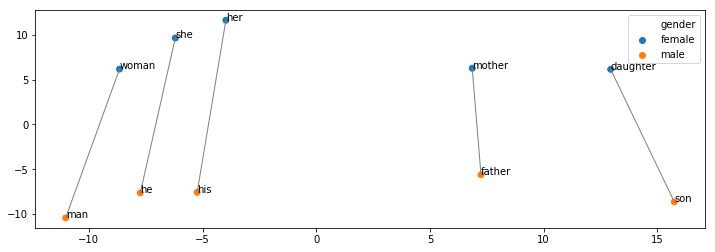

In [75]:
fig, ax = plt.subplots(figsize=(12,4))

sns.scatterplot(X_reduced[:,0], X_reduced[:,1], ax=ax, hue=gender_df.gender, s=60)

for i, word in enumerate(words):
    ax.annotate(word, (X_reduced[i,0], X_reduced[i,1]))
    
for i in range(0, X_reduced.shape[0], 2):
    ax.plot(X_reduced[i:i+2,0], X_reduced[i:i+2,1], c='gray', linewidth=1)

In [76]:
pipe.steps[1][1].explained_variance_ratio_.cumsum()

array([0.28442568, 0.51005677])

In [0]:
vecs = []
for i in range(0, X.shape[0], 2):
    a = X[i,:]
    b = X[i+1,:]
    mean_vec = (a+b)/2
    vecs.append(a-mean_vec)
    vecs.append(b-mean_vec)
X1 = torch.stack(vecs, dim=0)

In [0]:
X1_reduced = pipe.fit_transform(X1)

In [79]:
pipe.steps[1][1].explained_variance_ratio_.cumsum()

array([0.54846272, 0.71123405])

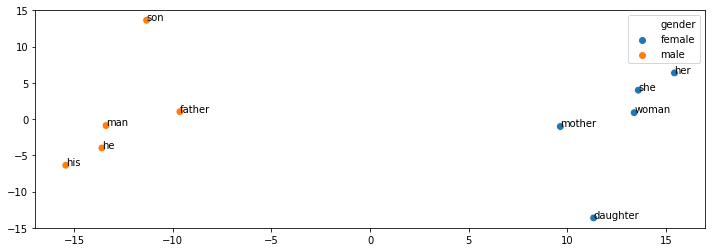

In [81]:
fig, ax = plt.subplots(figsize=(12,4))

sns.scatterplot(X1_reduced[:,0], X1_reduced[:,1], ax=ax, hue=gender_df.gender, s=60)

for i, word in enumerate(words):
    ax.annotate(word, (X1_reduced[i,0], X1_reduced[i,1]))
    

In [0]:
reliable_vector = get_word_vec('reliable')

reliable_misspellings = ['relieable', 'relyable', 'realible', 'realiable', 
                         'relable', 'relaible', 'reliabe', 'relaiable']

diff_reliable = [(reliable_vector - get_word_vec(s)).unsqueeze(0) 
                 for s in reliable_misspellings]

In [0]:
misspelling_vector = torch.cat(diff_reliable, dim = 0).mean(dim = 0)

In [0]:
word_vector = get_word_vec('recieve')

In [141]:
get_nearest_neighbours(word_vector + misspelling_vector)

['receive',
 'send',
 'recieve',
 'offer',
 'email',
 'mail',
 'customer',
 'your',
 'payment',
 'service']

In [0]:
gender_vector = X1.mean(dim=0)

In [0]:
word_vector = get_word_vec('du')

In [158]:
get_nearest_neighbours(word_vector + gender_vector)

['man', 'woman', 'men', 'boy', 'guy', 'he', 'himself', 'dude', 'gay', 'him']

In [0]:
vecs = []
for i in range(0, X.shape[0], 2):
    a = X[i,:]
    b = X[i+1,:]
    vecs.append(b-a)
X2 = torch.stack(vecs, dim=0)

In [0]:
gender_vector2 = X2.mean(dim=0)

In [174]:
gender_vector2.shape

torch.Size([300])

In [0]:
def get_masculine_word(feminine_word):
  word_vector = get_word_vec(feminine_word)
  candidates = get_nearest_neighbours(word_vector + gender_vector2)
  return [c for c in candidates if c not in [feminine_word, feminine_word+"s"]][0]

In [197]:
get_masculine_word('headmistress')

'headmaster'

In [198]:
get_masculine_word('daughter-in-law')

'son-in-law'

In [199]:
get_masculine_word('step-mother')

'step-father'

In [204]:
get_masculine_word('mother-in-law')

'father-in-law'

In [205]:
get_masculine_word('step-daughter')

'step-son'

In [206]:
get_masculine_word('stepdaughter')

'stepson'

In [207]:
get_masculine_word('policewoman')

'policeman'